# **회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀**

In [3]:
# (1) 데이터 가져오기
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

from sklearn.datasets import load_diabetes
diabetes =load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
df_X_feature = diabetes.feature_names

In [4]:
# (2) 모델에 입력할 데이터 X 준비하기 df_X에 있는 값들을 numpy array로 변환해서 저장해주세요. 
# (3) 모델에 예측할 데이터 y 준비하기 df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

import numpy as np
print(type(df_X))
print(type(df_y))
print(df_X_feature)
print(df_X)
print(df_y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 

In [5]:
# (4) train 데이터와 test 데이터로 분리하기 X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [6]:
# (5) 모델 준비하기 
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요. 모델 함수를 구현해주세요. 

import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


[0.08343044 0.73808711 0.88273021 0.29582514 0.41805115 0.10870999
 0.85551428 0.6102985  0.95392078 0.40291849]
0.665051698713966


In [7]:
# (6) 손실함수 loss 정의하기 손실함수를 MSE 함수로 정의해주세요.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
# (7) 기울기를 구하는 gradient 함수 구현하기 

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -65.45598299   -3.70184644 -175.59541383 -130.97839604  -46.09847126
  -31.59921205  109.85445709 -115.43279324 -157.9416037  -123.95262655]
db: -306.13673888551347


In [9]:
# (8) 하이퍼 파라미터인 학습률 설정하기 학습률, learning rate 를 설정해주세요. 
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요. 

LEARNING_RATE = 0.02 # 

- learning rate를 여러 숫자로 설정하여 Loss값을 측정한 결과 learning rate가 0.02 일때 가장 낮게 나왔다.

In [10]:
# (9) 모델 학습하기 
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요. 
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요. 
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 
# 다양한 데이터로 실험해 보세요.
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 15839.5204
Iteration 20 : Loss 9636.2605
Iteration 30 : Loss 6757.4832
Iteration 40 : Loss 5372.5069
Iteration 50 : Loss 4667.3261
Iteration 60 : Loss 4278.2381
Iteration 70 : Loss 4041.3715
Iteration 80 : Loss 3881.8313
Iteration 90 : Loss 3764.5711
Iteration 100 : Loss 3672.5684
Iteration 110 : Loss 3597.0903
Iteration 120 : Loss 3533.3203
Iteration 130 : Loss 3478.3705
Iteration 140 : Loss 3430.3601
Iteration 150 : Loss 3387.9744
Iteration 160 : Loss 3350.2435
Iteration 170 : Loss 3316.4245
Iteration 180 : Loss 3285.9335
Iteration 190 : Loss 3258.3031
Iteration 200 : Loss 3233.1541
Iteration 210 : Loss 3210.1754
Iteration 220 : Loss 3189.1093
Iteration 230 : Loss 3169.7403
Iteration 240 : Loss 3151.8867
Iteration 250 : Loss 3135.3940
Iteration 260 : Loss 3120.1297
Iteration 270 : Loss 3105.9792
Iteration 280 : Loss 3092.8424
Iteration 290 : Loss 3080.6319
Iteration 300 : Loss 3069.2701
Iteration 310 : Loss 3058.6880
Iteration 320 : Loss 3048.8239
Iteration 330 : 

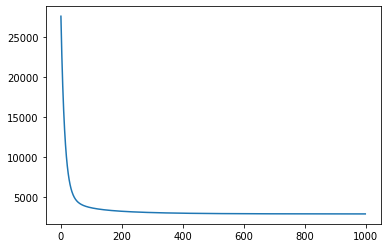

In [11]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [12]:
W, b

(array([  39.95779218, -225.89023915,  536.5665307 ,  335.04519726,
         -85.65673245, -128.48091199, -218.068603  ,  145.70895029,
         396.55738807,   90.6540884 ]), 151.32108286442357)

In [13]:
#  (10) test 데이터에 대한 성능 확인하기 test 데이터에 대한 성능을 확인해주세요. 

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("MSE 손살값: ", mse)

MSE 손살값:  2874.4545604647933


In [14]:
rmse = mse ** 0.5
rmse

53.613939982664895

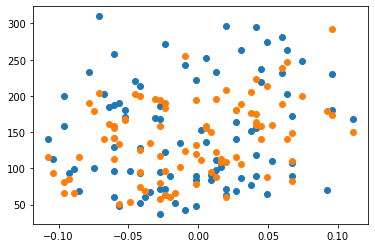

In [15]:
# (11) 정답 데이터와 예측한 데이터 시각화하기 x축에는 X 데이터의 첫 번째 컬럼을, 
# y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

루브릭

1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
기준: MSE 손실함수값 3000 이하를 달성 
  - MSE는 2874.48로 3000 이하를 달성했습니다. 

3. 시각화 요구사항이 정확하게 이루어졌는가?
기준: 데이터개수 시각화 및 예측결과 시각화를 진행하였으며, 예측과 실제 데이터가 크게 분리되지 않고 비슷하다.
  - scatter plot을 이용해 시각화를 했고 예측결과(주황색점)와 실제 데이터(파랑색점)가 비슷한 위치에 분포되어있습니다.

# **2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

In [19]:
#(1) 데이터 가져오기 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다. 
#여기에서 데이터를 상세히 확인할 수 있습니다.

from google.colab import files
from google.colab import drive 
import numpy as np
import pandas as pd

drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ex2/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train.shape

(10886, 12)

In [ ]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기 to_datetime 활용 : 
# 링크 참조 pandas datetime extract year month day 키워드로 검색해 보기 
from datetime import datetime # datatime 라이브러리 임포트
import calendar

In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


In [ ]:
train.shape

(10886, 19)

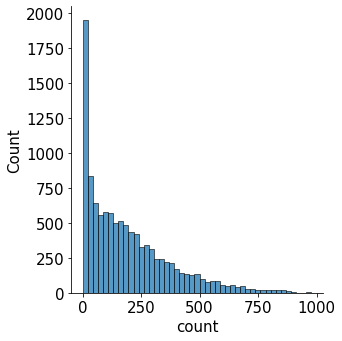

In [ ]:
#(3) year, month, day, hour, minute, second 데이터 개수 시각화하기 
# sns.countplot 활용해서 시각화하기 subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 

sns.displot(train['count']); # 분포도 출력

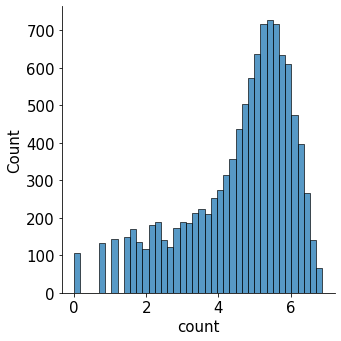

In [ ]:
sns.displot(np.log(train['count']));

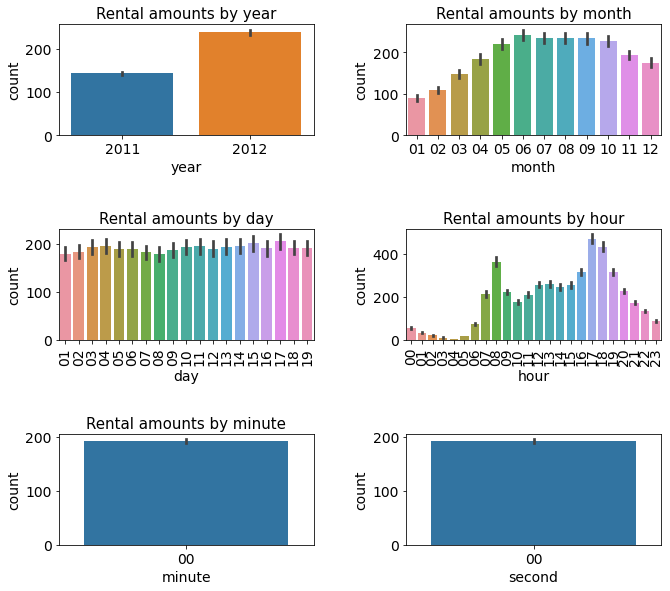

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
#axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

In [ ]:
train.head

<bound method NDFrame.head of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count        

In [ ]:
y = train['count']


In [ ]:
train.head

<bound method NDFrame.head of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count        

In [ ]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리 X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 
# 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 
# 오차 값이 말도 안 되게 적게 나올 수도 있습니다. 
# ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

drop_features = ['casual','count', 'registered', 'datetime', 'date', 'minute', 'second']

train = train.drop(drop_features, axis=1)

In [ ]:
train.head

<bound method NDFrame.head of        season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year month day hour  
0         0.0000  2011    01  01   00  
1         0.0000  2011   

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# (5) LinearRegression 모델 학습 
# sklearn의 LinearRegression 모델 불러오기 및 학습하기 '
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산 학습된 모델에 
# X_test를 입력해서 예측값 출력하기 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기 
# mse 값과 함께 rmse 값도 계산하기

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print ("mse : ", mse)
print ("rmse: ", rmse)


mse :  19945.370053754028
rmse:  141.22807813517122


In [ ]:
#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기 
#x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기 
#x축에 X 데이터 중 humidity 데이터를, 
#y축에는 count 데이터를 넣어서 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt

X_test['temp'] = X_test['temp'].astype(int) 
X_test['count'] =  y_pred
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
3133,3,0,1,1,33,40.150,59,0.0000,2011,07,19,11,248.106270
5786,1,1,0,1,4,6.820,54,6.0032,2012,01,16,06,48.797655
5224,4,0,0,1,9,11.365,48,12.9980,2011,12,11,18,200.906767
8953,3,0,1,2,29,34.090,62,12.9980,2012,08,15,10,292.785832
8054,2,0,1,1,25,31.060,53,16.9979,2012,06,15,23,388.486548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23,27.275,49,19.0012,2011,05,08,17,224.130198
5807,1,0,1,3,13,15.150,66,22.0028,2012,01,17,04,68.593142
10061,4,0,0,1,16,20.455,40,12.9980,2012,11,04,14,309.752802
5427,1,0,0,1,11,14.395,81,7.0015,2012,01,01,05,38.170302


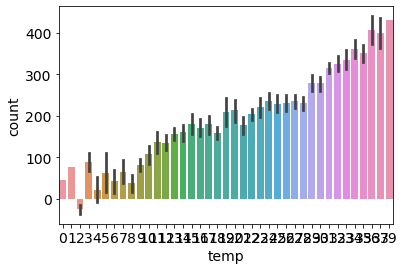

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sns.barplot(x='temp', y='count', data=X_test)

루브릭

2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
기준: RMSE 값 150 이하를 달성
  - RMSE 값은 141.22로 150 이하를 달성했습니다.